In [2]:
import os # Import the os module to interact with the operating system

In [3]:
base_dir="rps-cv-images" # Define the base directory where images are stored

In [4]:
rock_dir=os.path.join(base_dir,"rock") # Set path for the "rock" images directory
scissors_dir=os.path.join(base_dir,"scissors") # Set path for the "scissors" images directory
paper_dir=os.path.join(base_dir,"paper") # Set path for the "paper" images directory

### Count the Number of Images in Each Directory

The following code prints the number of images present in each category directory (`rock`, `paper`, and `scissors`). It uses `os.listdir` to list all files in each respective directory and `len` to count them

In [5]:
print("Rock:",len(os.listdir(rock_dir))) # Print the count of "rock" images
print("Paper:",len(os.listdir(paper_dir))) # Print the count of "paper" images
print("Scissors:",len(os.listdir(scissors_dir))) # Print the count of "scissors" images


Rock: 726
Paper: 712
Scissors: 750


### Select a Random Image and Load it with TensorFlow

The following code randomly selects an image from the `paper` directory using Python’s `random.sample` function, then loads the image with TensorFlow’s `tf.keras.utils.load_img` for further processing or visualization.

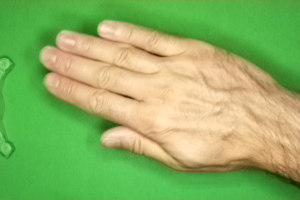

In [7]:
import random as rd 
import tensorflow as tf
rd_image=rd.sample(os.listdir(paper_dir),1)
img=tf.keras.utils.load_img(f"{paper_dir}/{rd_image[0]}")
img

### Convert the Loaded Image to an Array and Check its Shape

The following code converts the loaded image into a NumPy array using TensorFlow's `img_to_array` function. After converting, it prints the shape of the image, which provides information about its dimensions and channels.

In [8]:
img=tf.keras.utils.img_to_array(img)
img.shape

(200, 300, 3)

### Create a Training Dataset from Image Directory

The following code creates a training dataset from images stored in the `base_dir` directory. It uses TensorFlow's `image_dataset_from_directory` function to automatically label images based on their folder names. The dataset is split with 80% for training (`subset="training"`) and 20% for validation. Images are resized to 180x180 pixels, and a batch size of 128 is set. The `seed` parameter ensures reproducibility.

In [9]:
train_ds=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     validation_split=0.2,
                                                     subset="training",
                                                     image_size=(180,180),
                                                     batch_size=128,
                                                     seed=42)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


### Inspect the Shape of Image Batches and Labels

The following code iterates through the training dataset (`train_ds`) to retrieve a batch of images and their corresponding labels. It prints the shape of both the image batch and the labels batch, allowing you to verify the dimensions of the data being processed.

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)    # Print the shape of the image batch
    print(labels_batch.shape)    # Print the shape of the labels batch
    break  # Exit after the first batch for inspection

(128, 180, 180, 3)
(128,)


### Retrieve Class Names from the Training Dataset

The following code retrieves the class names from the training dataset (`train_ds`). These class names correspond to the folder names used in the image directory and are useful for understanding the labels associated with the images in the dataset.

In [11]:
classes_names=train_ds.class_names # Get the names of the classes from the dataset
classes_names # Display the class names

['paper', 'rock', 'scissors']

### Visualize a Sample of Images from the Training Dataset

The following code uses Matplotlib to visualize a sample of images from the training dataset (`train_ds`). It displays a grid of 9 images along with their corresponding labels (class names). The images are converted to a format suitable for display using NumPy.

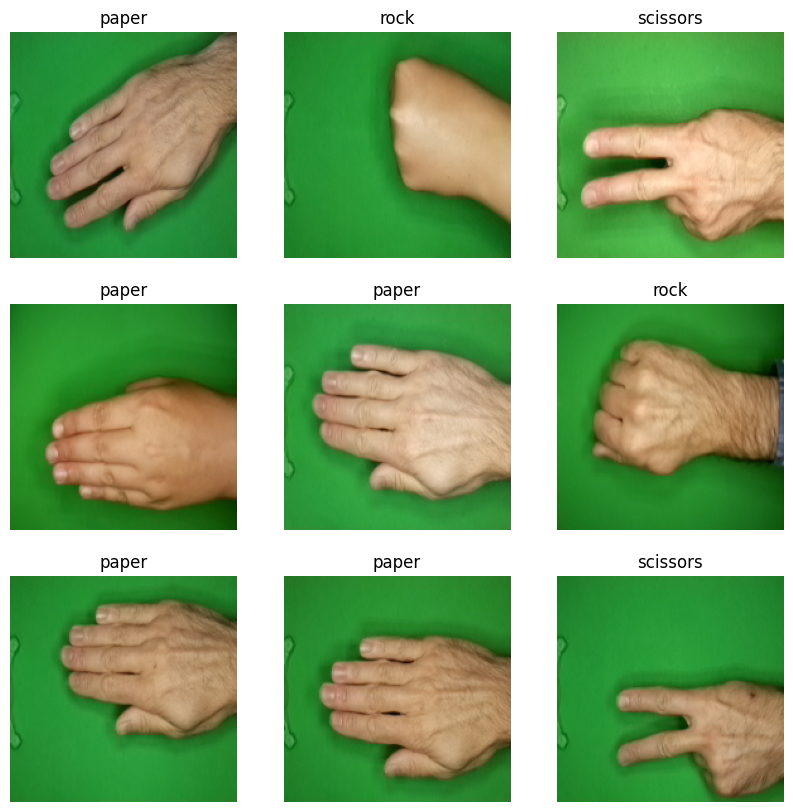

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))  # Create a figure for displaying images
for images, labels in train_ds.take(1):  # Take one batch of images and labels
    for i in range(9):  # Loop to display 9 images
        ax = plt.subplot(3, 3, i + 1)  # Create a subplot for each image
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
        plt.title(classes_names[labels[i]])  # Set the title as the class name
        plt.axis("off")  # Hide the axes

### Create a Validation Dataset from Image Directory

The following code creates a validation dataset from images stored in the `base_dir` directory. It uses TensorFlow's `image_dataset_from_directory` function to automatically label images based on their folder names. The dataset is split with 20% for validation (`subset="validation"`) and 80% for training. Images are resized to 180x180 pixels, and a batch size of 128 is set. The `seed` parameter ensures reproducibility.

In [14]:
val_ds=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                   validation_split=0.2,
                                                   subset="validation",
                                                   image_size=(180,180),
                                                   batch_size=128,
                                                   seed=42)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


### Optimize the Training and Validation Datasets

The following code optimizes the training and validation datasets for better performance during model training. It caches the datasets in memory, shuffles the training dataset with a buffer size of 1000 for randomness, and prefetches the data to improve input pipeline efficiency. The `AUTOTUNE` parameter dynamically adjusts the prefetch buffer size.

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # Optimize the training dataset
val_ds=val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE) # Optimize the validation dataset

### Data Augmentation Pipeline

The following code creates a data augmentation pipeline using TensorFlow's `Sequential` model. It includes random horizontal and vertical flips, as well as random rotations, to enhance the training dataset.

In [16]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical",seed=42), # Randomly flip images
    tf.keras.layers.RandomRotation(0.1,seed=42) #Random rotate images
])

#### The following code retrieves a single batch of images from the training dataset and visualizes the first image using Matplotlib.

AxesImage(shape=(180, 180, 3))


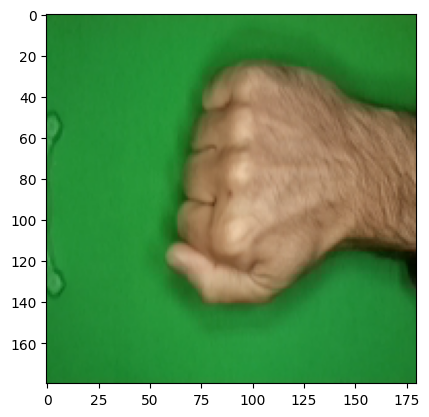

In [17]:
for images,_ in train_ds.take(1):
    print(plt.imshow(images[0].numpy().astype("uint8")))

### Visualize Augmented Images from the Training Dataset

The following code visualizes a grid of 9 augmented images generated from the training dataset. It applies the data augmentation pipeline to the images and displays the first augmented image in each subplot.

AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))
AxesImage(shape=(180, 180, 3))


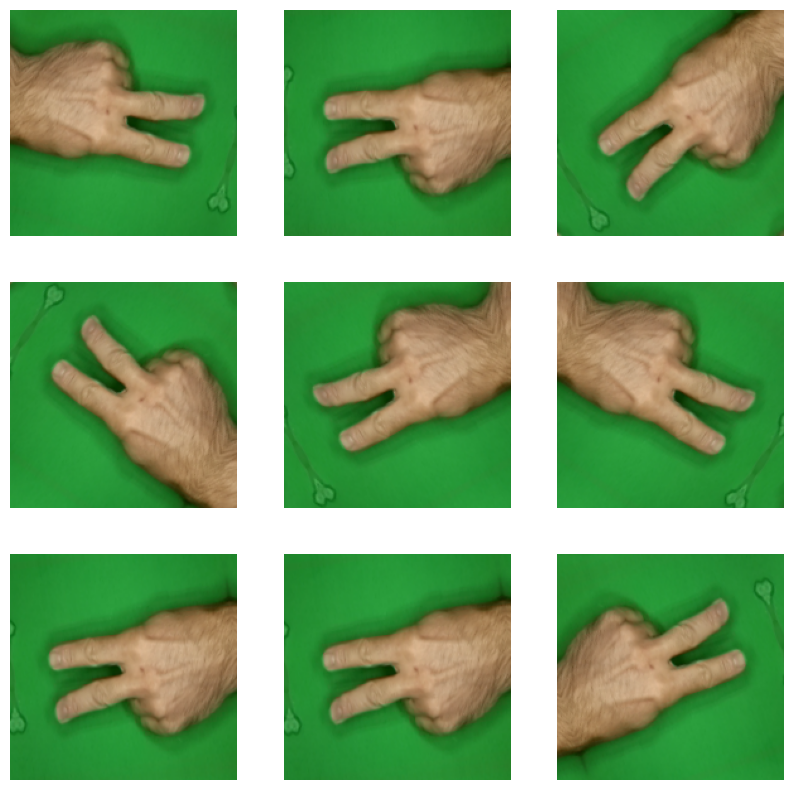

In [18]:
plt.figure(figsize=(10, 10))  # Set the figure size for display
for images, _ in train_ds.take(1):
    for i in range(9):  # Loop to display 9 images
        augmented_images = data_augmentation(images)  # Apply data augmentation
        ax = plt.subplot(3, 3, i + 1)  # Create a subplot for each augmented image
        print(plt.imshow(augmented_images[0].numpy().astype("uint8")))
        plt.axis("off")  # Display the first augmented image

### Define a Convolutional Neural Network Model

The following code defines a convolutional neural network (CNN) using TensorFlow's `Sequential` model. The architecture includes image rescaling, data augmentation, several convolutional layers with ReLU activation, max pooling layers, and fully connected layers to output predictions for three classes.

In [122]:
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.0,input_shape=(180,180,3)),# Rescale pixel values to [0, 1]
    data_augmentation,
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(3)
    ])

In [123]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 180, 180, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 90, 90, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 22, 22, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,234,371 (8.52 MB)

 Trainable params: 2,234,371 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

The following code compiles the CNN model using the Adam optimizer and the Sparse Categorical Crossentropy loss function, which is suitable for multi-class classification problems. The model will also track accuracy as a performance metric during training and evaluation.

In [124]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

### Train the Model

The following code trains the CNN model on the training dataset (`train_ds`) and evaluates it on the validation dataset (`val_ds`). The model is trained for 15 epochs, during which the loss and accuracy will be monitored for both training and validation sets.

In [125]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 215s 15s/step - accuracy: 0.3477 - loss: 1.1100 - val_accuracy: 0.2998 - val_loss: 1.0957
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 200s 14s/step - accuracy: 0.3630 - loss: 1.0781 - val_accuracy: 0.4897 - val_loss: 0.9341
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 195s 14s/step - accuracy: 0.6159 - loss: 0.8533 - val_accuracy: 0.9039 - val_loss: 0.3220
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 183s 13s/step - accuracy: 0.8562 - loss: 0.3820 - val_accuracy: 0.9382 - val_loss: 0.2034
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 173s 12s/step - accuracy: 0.8318 - loss: 0.4135 - val_accuracy: 0.9222 - val_loss: 0.2147
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 176s 13s/step - accuracy: 0.8821 - loss: 0.3345 - val_accuracy: 0.9497 - val_loss: 0.1761
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1285s 98s/step - accuracy: 0.9071 - loss: 0.2439 - val_accuracy: 0.9680 - val_loss: 0.1047
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 206s 15s/step - accuracy: 0.9186 - loss: 0.2113 - val_accuracy: 0

### Visualize Training and Validation Metrics

The following code extracts the accuracy and loss values from the training history and visualizes them using Matplotlib. Two plots are created: one for training and validation accuracy, and another for training and validation loss, allowing for an easy comparison of model performance over epochs.

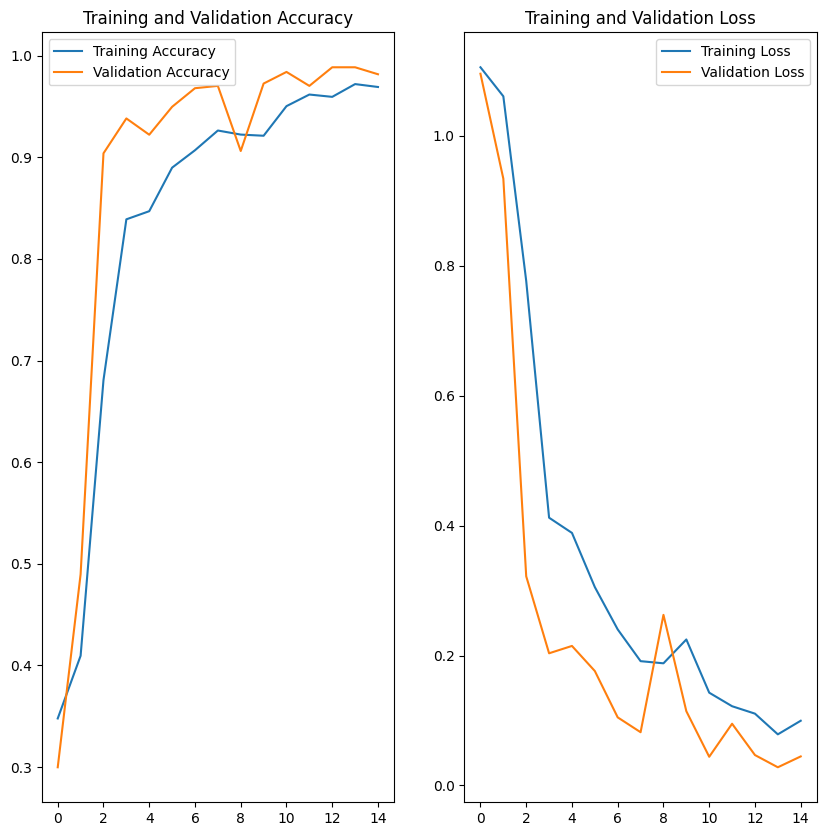

In [126]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

### Load and Resize a Random Image

The following code selects a random image from the `paper_dir` directory, resizes it to the target dimensions of (180, 180), and loads it using TensorFlow's `load_img` function.

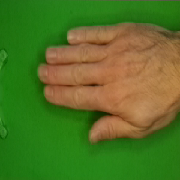

In [127]:
rd_image = rd.sample(os.listdir(paper_dir), 1)  # Select a random image file from the paper directory
img = tf.keras.utils.load_img(f"{paper_dir}/{rd_image[0]}", target_size=(180, 180))  # Load and resize the image
img  # Display the image

### Convert Image to Array and Add Batch Dimension

The following code converts the loaded image into a numerical array format and expands its dimensions to add a batch axis, making it compatible with model predictions. The resulting shape is displayed to confirm the transformation.

In [131]:
img_array = tf.keras.utils.img_to_array(img)  # Convert the image to a NumPy array
img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
img_array.shape  # Display the shape of the array

TensorShape([1, 180, 180, 3])

### Make a Prediction on the Image

The following code uses the trained model to make a prediction on the prepared image array. The `predict` method returns an array of prediction scores for each class, which can be used to determine the most likely class label for the image.

In [132]:
predictions=model.predict(img_array) # Generate predictions for the input image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


### Interpret the Model's Prediction

The following code applies the softmax function to the prediction scores to convert them into probabilities. It then identifies the class with the highest probability and maps it to the corresponding class name from `classes_names`.

In [133]:
import numpy as np
score=tf.nn.softmax(predictions[0]) #Convert prediction scores to probabilities
classes_names[np.argmax(score)] #Get  the class name with the highest probability

'paper'